In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

D:\Anaconda3\envs\tensorFlow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
# Get images
image = img_to_array(load_img('timg.jpg'))
image = np.array(image, dtype=float)

In [7]:
from skimage import transform,data
image = transform.resize(image, (400, 400))

D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [8]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [9]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [10]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [20]:
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 759ms/step - loss: 0.0037
Epoch 2/1000
1/1 [==============================] - 1s 694ms/step - loss: 0.0029
Epoch 3/1000
1/1 [==============================] - 1s 651ms/step - loss: 0.0027
Epoch 4/1000
1/1 [==============================] - 1s 656ms/step - loss: 0.0022
Epoch 5/1000
1/1 [==============================] - 1s 660ms/step - loss: 0.0017
Epoch 6/1000
1/1 [==============================] - 1s 666ms/step - loss: 0.0012
Epoch 7/1000
1/1 [==============================] - 1s 650ms/step - loss: 0.0011
Epoch 8/1000
1/1 [==============================] - 1s 665ms/step - loss: 0.0010
Epoch 9/1000
1/1 [==============================] - 1s 660ms/step - loss: 9.7537e-04
Epoch 10/1000
1/1 [==============================] - 1s 650ms/step - loss: 9.5076e-04
Epoch 11/1000
1/1 [==============================] - 1s 660ms/step - loss: 9.2998e-04
Epoch 12/1000
1/1 [==============================] - 1s 673ms/step - loss: 9.1729e-04
Epoch 13/

Epoch 99/1000
1/1 [==============================] - 1s 659ms/step - loss: 6.5403e-04
Epoch 100/1000
1/1 [==============================] - 1s 601ms/step - loss: 7.3603e-04
Epoch 101/1000
1/1 [==============================] - 1s 600ms/step - loss: 7.0196e-04
Epoch 102/1000
1/1 [==============================] - 1s 611ms/step - loss: 9.4262e-04
Epoch 103/1000
1/1 [==============================] - 1s 613ms/step - loss: 6.9007e-04
Epoch 104/1000
1/1 [==============================] - 1s 597ms/step - loss: 8.5548e-04
Epoch 105/1000
1/1 [==============================] - 1s 603ms/step - loss: 9.0208e-04
Epoch 106/1000
1/1 [==============================] - 1s 602ms/step - loss: 0.0018
Epoch 107/1000
1/1 [==============================] - 1s 605ms/step - loss: 6.6672e-04
Epoch 108/1000
1/1 [==============================] - 1s 633ms/step - loss: 6.2252e-04
Epoch 109/1000
1/1 [==============================] - 1s 609ms/step - loss: 9.0248e-04
Epoch 110/1000
1/1 [============================

Epoch 194/1000
1/1 [==============================] - 1s 647ms/step - loss: 8.5729e-04
Epoch 195/1000
1/1 [==============================] - 1s 676ms/step - loss: 4.9795e-04
Epoch 196/1000
1/1 [==============================] - 1s 670ms/step - loss: 6.0692e-04
Epoch 197/1000
1/1 [==============================] - 1s 617ms/step - loss: 8.6966e-04
Epoch 198/1000
1/1 [==============================] - 1s 613ms/step - loss: 0.0016
Epoch 199/1000
1/1 [==============================] - 1s 626ms/step - loss: 0.0019
Epoch 200/1000
1/1 [==============================] - 1s 655ms/step - loss: 0.0012
Epoch 201/1000
1/1 [==============================] - 1s 648ms/step - loss: 0.0016
Epoch 202/1000
1/1 [==============================] - 1s 618ms/step - loss: 0.0018
Epoch 203/1000
1/1 [==============================] - 1s 674ms/step - loss: 8.8278e-04
Epoch 204/1000
1/1 [==============================] - 1s 637ms/step - loss: 5.9060e-04
Epoch 205/1000
1/1 [==============================] - 1s 627ms/

Epoch 289/1000
1/1 [==============================] - 1s 717ms/step - loss: 4.2553e-04
Epoch 290/1000
1/1 [==============================] - 1s 728ms/step - loss: 5.6155e-04
Epoch 291/1000
1/1 [==============================] - 1s 784ms/step - loss: 4.5565e-04
Epoch 292/1000
1/1 [==============================] - 1s 833ms/step - loss: 6.0244e-04
Epoch 293/1000
1/1 [==============================] - 1s 766ms/step - loss: 4.1577e-04
Epoch 294/1000
1/1 [==============================] - 1s 737ms/step - loss: 4.6387e-04
Epoch 295/1000
1/1 [==============================] - 1s 743ms/step - loss: 4.4952e-04
Epoch 296/1000
1/1 [==============================] - 1s 690ms/step - loss: 5.8845e-04
Epoch 297/1000
1/1 [==============================] - 1s 685ms/step - loss: 3.9278e-04
Epoch 298/1000
1/1 [==============================] - 1s 806ms/step - loss: 4.7046e-04
Epoch 299/1000
1/1 [==============================] - 1s 822ms/step - loss: 4.4893e-04
Epoch 300/1000
1/1 [=======================

Epoch 384/1000
1/1 [==============================] - 1s 671ms/step - loss: 3.6605e-04
Epoch 385/1000
1/1 [==============================] - 1s 638ms/step - loss: 4.3383e-04
Epoch 386/1000
1/1 [==============================] - 1s 662ms/step - loss: 3.6175e-04
Epoch 387/1000
1/1 [==============================] - 1s 655ms/step - loss: 4.0378e-04
Epoch 388/1000
1/1 [==============================] - 1s 651ms/step - loss: 3.4667e-04
Epoch 389/1000
1/1 [==============================] - 1s 665ms/step - loss: 3.8585e-04
Epoch 390/1000
1/1 [==============================] - 1s 663ms/step - loss: 3.4746e-04
Epoch 391/1000
1/1 [==============================] - 1s 645ms/step - loss: 3.9532e-04
Epoch 392/1000
1/1 [==============================] - 1s 652ms/step - loss: 3.5432e-04
Epoch 393/1000
1/1 [==============================] - 1s 636ms/step - loss: 4.1492e-04
Epoch 394/1000
1/1 [==============================] - 1s 684ms/step - loss: 3.5162e-04
Epoch 395/1000
1/1 [=======================

Epoch 479/1000
1/1 [==============================] - 1s 676ms/step - loss: 3.8298e-04
Epoch 480/1000
1/1 [==============================] - 1s 669ms/step - loss: 5.4832e-04
Epoch 481/1000
1/1 [==============================] - 1s 657ms/step - loss: 3.7777e-04
Epoch 482/1000
1/1 [==============================] - 1s 680ms/step - loss: 3.8247e-04
Epoch 483/1000
1/1 [==============================] - 1s 657ms/step - loss: 3.5480e-04
Epoch 484/1000
1/1 [==============================] - 1s 704ms/step - loss: 4.0773e-04
Epoch 485/1000
1/1 [==============================] - 1s 674ms/step - loss: 3.3867e-04
Epoch 486/1000
1/1 [==============================] - 1s 671ms/step - loss: 3.6953e-04
Epoch 487/1000
1/1 [==============================] - 1s 682ms/step - loss: 4.2047e-04
Epoch 488/1000
1/1 [==============================] - 1s 663ms/step - loss: 2.9497e-04
Epoch 489/1000
1/1 [==============================] - 1s 686ms/step - loss: 2.8734e-04
Epoch 490/1000
1/1 [=======================

Epoch 574/1000
1/1 [==============================] - 1s 670ms/step - loss: 3.0979e-04
Epoch 575/1000
1/1 [==============================] - 1s 728ms/step - loss: 3.1224e-04
Epoch 576/1000
1/1 [==============================] - 1s 677ms/step - loss: 3.3631e-04
Epoch 577/1000
1/1 [==============================] - 1s 624ms/step - loss: 3.3594e-04
Epoch 578/1000
1/1 [==============================] - 1s 566ms/step - loss: 3.4983e-04
Epoch 579/1000
1/1 [==============================] - 1s 558ms/step - loss: 4.7618e-04
Epoch 580/1000
1/1 [==============================] - 1s 593ms/step - loss: 4.5543e-04
Epoch 581/1000
1/1 [==============================] - 1s 600ms/step - loss: 4.8316e-04
Epoch 582/1000
1/1 [==============================] - 1s 578ms/step - loss: 4.6715e-04
Epoch 583/1000
1/1 [==============================] - 1s 590ms/step - loss: 4.3698e-04
Epoch 584/1000
1/1 [==============================] - 1s 572ms/step - loss: 3.1593e-04
Epoch 585/1000
1/1 [=======================

Epoch 669/1000
1/1 [==============================] - 1s 649ms/step - loss: 2.4441e-04
Epoch 670/1000
1/1 [==============================] - 1s 679ms/step - loss: 2.3897e-04
Epoch 671/1000
1/1 [==============================] - 1s 619ms/step - loss: 2.3450e-04
Epoch 672/1000
1/1 [==============================] - 1s 619ms/step - loss: 2.3084e-04
Epoch 673/1000
1/1 [==============================] - 1s 640ms/step - loss: 2.2760e-04
Epoch 674/1000
1/1 [==============================] - 1s 688ms/step - loss: 2.2468e-04
Epoch 675/1000
1/1 [==============================] - 1s 704ms/step - loss: 2.2125e-04
Epoch 676/1000
1/1 [==============================] - 1s 706ms/step - loss: 2.2004e-04
Epoch 677/1000
1/1 [==============================] - 1s 676ms/step - loss: 2.2543e-04
Epoch 678/1000
1/1 [==============================] - 1s 583ms/step - loss: 2.3964e-04
Epoch 679/1000
1/1 [==============================] - 1s 582ms/step - loss: 2.4434e-04
Epoch 680/1000
1/1 [=======================

1/1 [==============================] - 1s 769ms/step - loss: 2.9214e-04
Epoch 764/1000
1/1 [==============================] - 1s 714ms/step - loss: 2.4683e-04
Epoch 765/1000
1/1 [==============================] - 1s 634ms/step - loss: 2.2456e-04
Epoch 766/1000
1/1 [==============================] - 1s 802ms/step - loss: 2.1416e-04
Epoch 767/1000
1/1 [==============================] - 1s 629ms/step - loss: 2.4087e-04
Epoch 768/1000
1/1 [==============================] - 1s 693ms/step - loss: 2.9785e-04
Epoch 769/1000
1/1 [==============================] - 1s 682ms/step - loss: 2.3079e-04
Epoch 770/1000
1/1 [==============================] - 1s 712ms/step - loss: 2.3393e-04
Epoch 771/1000
1/1 [==============================] - 1s 718ms/step - loss: 2.2169e-04
Epoch 772/1000
1/1 [==============================] - 1s 687ms/step - loss: 2.4155e-04
Epoch 773/1000
1/1 [==============================] - 1s 666ms/step - loss: 2.5513e-04
Epoch 774/1000
1/1 [==============================] - 1s 6

Epoch 858/1000
1/1 [==============================] - 1s 663ms/step - loss: 2.0002e-04
Epoch 859/1000
1/1 [==============================] - 1s 670ms/step - loss: 1.9375e-04
Epoch 860/1000
1/1 [==============================] - 1s 688ms/step - loss: 1.7660e-04
Epoch 861/1000
1/1 [==============================] - 1s 683ms/step - loss: 1.7860e-04
Epoch 862/1000
1/1 [==============================] - 1s 687ms/step - loss: 2.0953e-04
Epoch 863/1000
1/1 [==============================] - 1s 696ms/step - loss: 2.2827e-04
Epoch 864/1000
1/1 [==============================] - 1s 698ms/step - loss: 2.3498e-04
Epoch 865/1000
1/1 [==============================] - 1s 676ms/step - loss: 2.6302e-04
Epoch 866/1000
1/1 [==============================] - 1s 676ms/step - loss: 2.5549e-04
Epoch 867/1000
1/1 [==============================] - 1s 658ms/step - loss: 2.1926e-04
Epoch 868/1000
1/1 [==============================] - 1s 681ms/step - loss: 1.8875e-04
Epoch 869/1000
1/1 [=======================

Epoch 953/1000
1/1 [==============================] - 1s 850ms/step - loss: 2.0294e-04
Epoch 954/1000
1/1 [==============================] - 1s 771ms/step - loss: 1.9350e-04
Epoch 955/1000
1/1 [==============================] - 1s 675ms/step - loss: 1.9314e-04
Epoch 956/1000
1/1 [==============================] - 1s 600ms/step - loss: 2.0658e-04
Epoch 957/1000
1/1 [==============================] - 1s 587ms/step - loss: 2.3553e-04
Epoch 958/1000
1/1 [==============================] - 1s 637ms/step - loss: 2.8686e-04
Epoch 959/1000
1/1 [==============================] - 1s 698ms/step - loss: 4.0246e-04
Epoch 960/1000
1/1 [==============================] - 1s 659ms/step - loss: 4.3265e-04
Epoch 961/1000
1/1 [==============================] - 1s 700ms/step - loss: 4.1792e-04
Epoch 962/1000
1/1 [==============================] - 1s 699ms/step - loss: 2.5717e-04
Epoch 963/1000
1/1 [==============================] - 1s 660ms/step - loss: 2.2659e-04
Epoch 964/1000
1/1 [=======================

In [7]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("img_result.png", lab2rgb(cur))
imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))

1/1 [==============================] - 0s 333ms/step
0.00039919823757372797


D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


## 上色

In [16]:
from skimage import transform,data
import matplotlib.pyplot as plt


In [12]:
image_x = img_to_array(load_img('1.jpg'))
image_x = np.array(image_x, dtype=float)

In [13]:
dst=transform.resize(image_x, (400, 400))

D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [23]:
len(image)

326

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


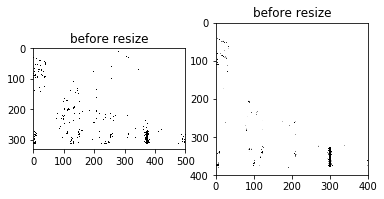

In [17]:
#画图
plt.figure('resize')

plt.subplot(121)
plt.title('before resize')
plt.imshow(image_x,plt.cm.gray)

plt.subplot(122)
plt.title('before resize')
plt.imshow(dst,plt.cm.gray)

plt.show()

In [18]:
X_2 = rgb2lab(1.0/255*dst)[:,:,0]
Y_2 = rgb2lab(1.0/255*dst)[:,:,1:]
Y_2 /= 128
X_2 = X_2.reshape(1, 400, 400, 1)
Y_2 = Y_2.reshape(1, 400, 400, 2)

In [21]:

output = model.predict(X_2)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X_2[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("img_result_3.png", lab2rgb(cur))
imsave("img_gray_version_3.png", rgb2gray(lab2rgb(cur)))

D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [25]:
#把维度拉回来
dst=transform.resize(cur, (326, 500))
imsave("img_result_22.png", lab2rgb(dst))
imsave("img_gray_version_22.png", rgb2gray(lab2rgb(dst)))

D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
